In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0).reset_index()
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 10)


,id,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [3]:
len(data) - len(data.drop_duplicates()) # check duplicates

0

In [4]:
lower_bound = data['home_cost'].mean() - 2 * data['home_cost'].std() #find outlier
upper_bound = data['home_cost'].mean() + 2 * data['home_cost'].std()
count = len(data[(data['home_cost'] < lower_bound) | (data['home_cost'] > upper_bound)])
print(f'Количество выбросов = {count}')

data = data[(data['home_cost'] >= lower_bound) & (data['home_cost'] <= upper_bound)] #delete outlier

Количество выбросов = 5


# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

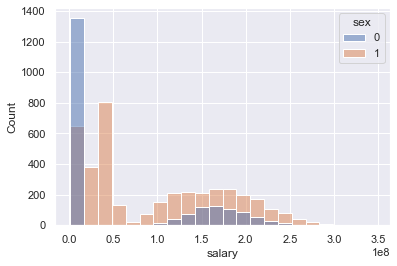

In [5]:
plt.figure()

woman_salary = data[data['sex']==0]['salary']
man_salary = data[data['sex']==1]['salary']

sns.histplot(data=data, x="salary", hue="sex")

plt.show()

In [6]:
print('Средняя зарплата женщин', woman_salary.mean())
print('Средняя зарплата мужчин', man_salary.mean())

Средняя зарплата женщин 57748624.68451563
Средняя зарплата мужчин 98459581.64085485


Визуально кажется, что средняя зарплата женщин будет меньше, так как много женщин без зарплаты.

In [7]:
from scipy import stats  # Импортируем библиотеку

# Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(woman_salary, man_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, значит мужчины получают больше')

p-value 2.337895790488446e-79
Выборки отличаются, значит мужчины получают больше


In [8]:
 # YOUR CODE

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

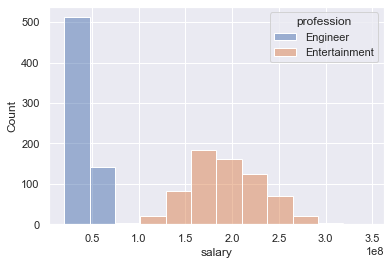

In [9]:
plt.figure()

Engineer_salary = data[data['profession']=='Engineer']['salary']
Entertainment_salary = data[data['profession']=='Entertainment']['salary']

sns.histplot(data=data[data['profession'].isin(['Engineer','Entertainment'])], x="salary", hue="profession")

plt.show()

In [10]:
t, p_value  = stats.ttest_ind(Engineer_salary, Entertainment_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, люди из сферы развлечений получают больше')

p-value 0.0
Выборки отличаются, люди из сферы развлечений получают больше


<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

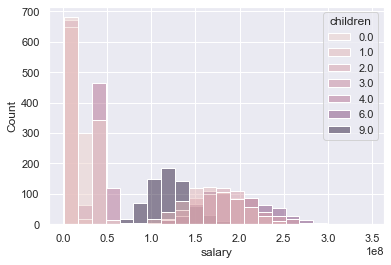

In [11]:
import seaborn as sns

plt.figure()

big_fam_salary = data[data['children'] > 3]['salary']
small_fam_salary = data[data['children'] <= 3]['salary']

sns.histplot(data=data, x="salary", hue="children")

# plt.xlabel('Count')
# plt.xlabel('Salary')

plt.show()

In [12]:
print('Средняя зарплата многодетных', big_fam_salary.mean())
print('Средняя зарплата малодетных', small_fam_salary.mean())

Средняя зарплата многодетных 119251724.70564434
Средняя зарплата малодетных 67500796.0390939


In [13]:
t, p_value  = stats.ttest_ind(big_fam_salary, small_fam_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, многодетные в среднем получают больше')

p-value 3.2135564930092e-128
Выборки отличаются, многодетные в среднем получают больше


<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

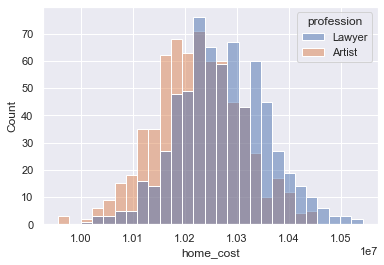

In [14]:
plt.figure()

artist_home_cost = data[data['profession'] == 'Artist']['home_cost']
lawyer_home_cost = data[data['profession'] == 'Lawyer']['home_cost']

sns.histplot(data=data[data['profession'].isin(['Artist', 'Lawyer'])], x="home_cost", hue="profession")

plt.show()

In [15]:
t, p_value  = stats.ttest_ind(artist_home_cost, lawyer_home_cost) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, у адвокатов дома дороже')

p-value 1.6456526985141669e-24
Выборки отличаются, у адвокатов дома дороже


<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

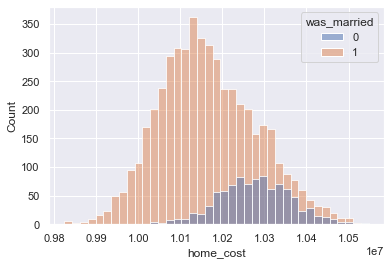

In [16]:
plt.figure()

not_married_home_cost = data[data['was_married'] == 0]['home_cost']
was_married_home_cost = data[data['was_married'] == 1]['home_cost']

sns.histplot(data=data, x="home_cost", hue='was_married')

plt.show()

In [17]:
t, p_value  = stats.ttest_ind(not_married_home_cost, was_married_home_cost) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, у холостых дома дороже')

p-value 2.2517376196728857e-163
Выборки отличаются, у холостых дома дороже


<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [18]:
import scipy.stats as stats

contingency_table = data[['was_married', 'sex', 'id']].groupby(['was_married', 'sex']).count().unstack('sex')
contingency_table.columns = contingency_table.columns.droplevel(0)
contingency_table

sex,0,1
was_married,,
0,670,278
1,1358,3689


In [19]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)


significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

print(pval)
if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Таки мужчины чаще бывают в браке')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.000000, significance=0.05

3.9762585992254126e-150
На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.
Таки мужчины чаще бывают в браке


# Гипотезы при множественном тестировании (10 баллов)

In [20]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

<AxesSubplot:xlabel='salary', ylabel='Count'>

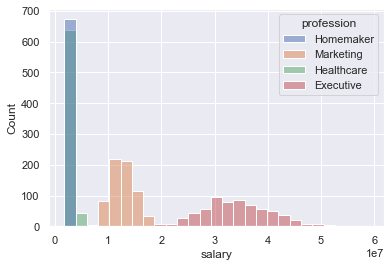

In [21]:
prof = ['Homemaker', 'Marketing', 'Healthcare', 'Executive']

sns.histplot(data = data[data['profession'].isin(prof)], x="salary", hue="profession")


In [22]:
data_prof = [data[data['profession'] == p]['salary'] for p in prof]

t, p_value  = stats.kruskal(data_prof[0], data_prof[1], data_prof[2], data_prof[3],) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, зарплаты у всех разные')

p-value 0.0
Выборки отличаются, зарплаты у всех разные


<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

<AxesSubplot:xlabel='salary', ylabel='Count'>

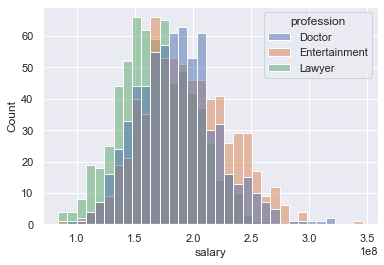

In [23]:
prof = ['Doctor', 'Entertainment', 'Lawyer' ]

sns.histplot(data = data[data['profession'].isin(prof)], x="salary", hue="profession")

In [24]:
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются, зарплаты у всех разные (а так и не скажешь)')
else:
    print(f'Не можем отклонить нулевую гипотезу на уровне о том, что зарплаты разные, на уровне значимости {alpha}')

p-value 0.0
Выборки отличаются, зарплаты у всех разные (а так и не скажешь)


# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [29]:
import statsmodels.formula.api as smf
# import statsmodels.api as sm

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()
features = ['was_married', 
            'children', 
            'salary', 
            'sex', 
            'age', 
            'home_cost']

target = 'happyness'

model = smf.ols(data=data, formula="happyness ~ was_married + children + salary + sex + age + home_cost").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happyness   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     941.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:29:51   Log-Likelihood:                 4710.5
No. Observations:                5995   AIC:                            -9407.
Df Residuals:                    5988   BIC:                            -9360.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0845      0.168      0.503      0.615      -0.245       0.414
was_married     0.0534      0.006      8.553      0.000       0.041       0.066
children        0.0089      0.001      8.827      0.000       0.007       0.011
salary        2.17e-10   3.37e-11      6.431      0.000    1.51e-10    2.83e-10
sex             0.0658      0.004     17.153      0.000       0.058       0.073
age             0.0018   7.47e-05     24.208      0.000       0.002       0.002
home_cost    1.823e-08   1.66e-08      1.100      0.271   -1.43e-08    5.07e-08
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.040
Skew:                           0.004   Prob(JB):                        0.980
Kurtosis:                       2.990   Cond. No.                     1.38e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


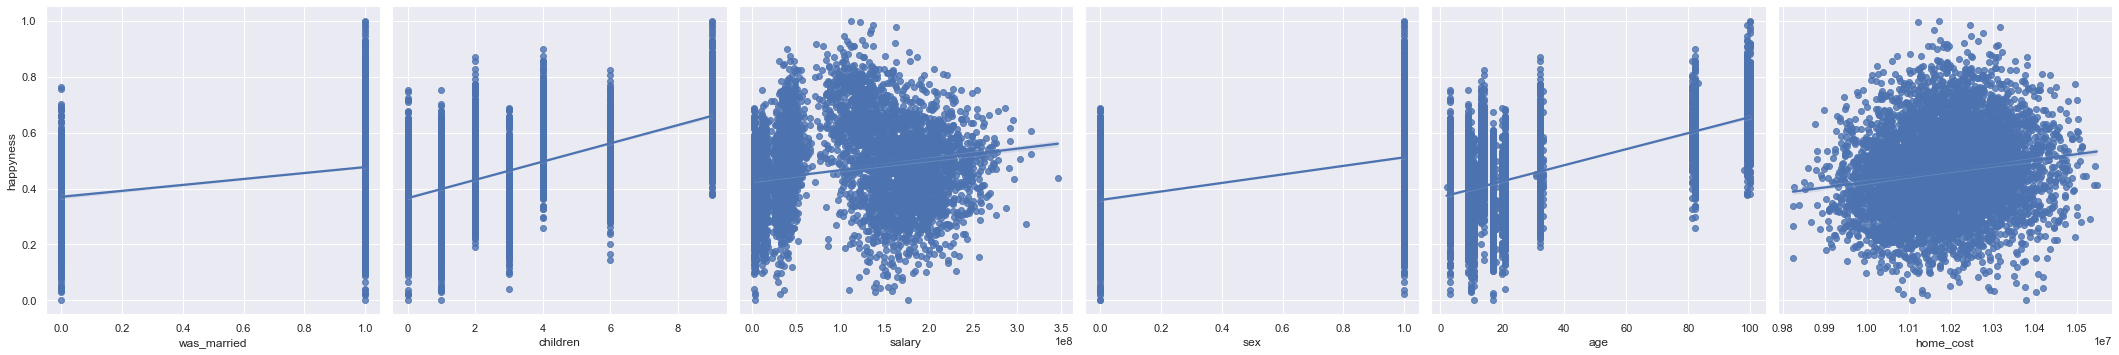

In [30]:
sns.pairplot(
    data, 
    y_vars=target, 
    x_vars=features, 
    size=5,
    kind='reg',
    diag_kind=None
)

**Существует ли связь между уровнем счастья и зарплатой?** \
Да

**Насколько сильны эти отношения?** \
Статистически значимо

**Как факт брака способствуют стоимости недвижимости?** \

**Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?** \
В целом да, R2 = 0.485 > 0, а значит это точнее чем брать просто средний уровень

**Какие признаки не влияют на уровень счастья? (стат. значимость)** \
Стоимость дома


**Какой признак самый сильный?** \
Сложно сказать, так как у всех p-value близок к 0, а по коэффицентам нельзя судить.

**Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?**

Кажется, что всю, так как остатки случайны

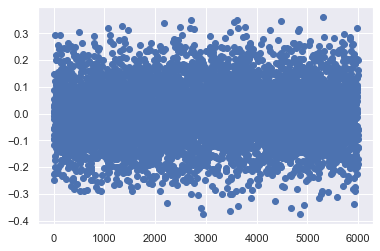

In [31]:
data['residuals'] = model.resid

plt.plot(data['residuals'], 'o')

**Наблюдается ли гетероскедастичность в остатках?**

Не наблюдается

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(model.resid, data[features].values)

(2005.8509976801156, 0.0, 501.9049433901834, 0.0)

**Есть ли в данных автокоррелированность?** \
Автокореллированости нет по статистике Дарбина-Уотсона

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**